### Importando pacotes

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy import stats
from scipy.stats import norm, skew 

### Carregando os dados

In [2]:
dataset = pd.read_csv("train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analisando ocorrências de NAs no dataset

In [3]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Substituindo os NANs de Age e Embarked pela mediana

#### Criando um novo conjunto de dados específico para idade sem os NANs e plotando

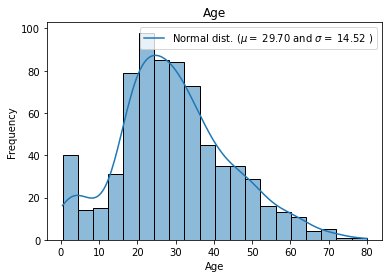

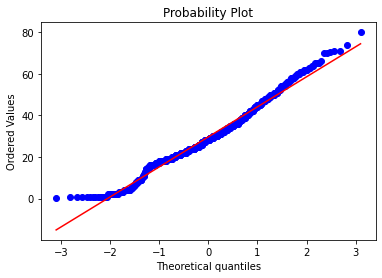

In [4]:
ages = dataset['Age'].dropna(inplace = False)

srn.histplot(ages, kde = True);
(mu, sigma) = norm.fit(ages)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Age')

fig = plt.figure()
res = stats.probplot(ages, plot=plt)
plt.show()

#### Substituindo os NANs da idade no dataset pela mediana da idade

In [5]:
median_Age = sts.median(dataset['Age'].dropna())
dataset['Age'].fillna(median_Age, inplace=True)

#### Substituindo os NANs do Embarked do dataset pela moda

In [6]:
agrupado_Embarked = dataset.groupby(['Embarked']).size()
agrupado_Embarked

Embarked
C    168
Q     77
S    644
dtype: int64

In [7]:
dataset['Embarked'].fillna('S', inplace=True)

In [8]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Analisando ocorrências de dados duplicados

In [9]:
dataset[dataset.duplicated(['PassengerId'], keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

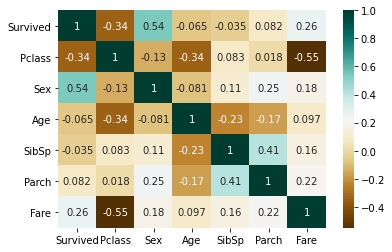

In [11]:
g = srn.heatmap(dataset[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].corr(),cmap="BrBG",annot=True)

### Removendo a coluna PassengerId, Name, Ticket e Cabin

In [12]:
dataset = dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch'], axis = 1)
dataset.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


### Treinando o modelo 

In [13]:
X = dataset.iloc[:, 1:].values

In [14]:
y = dataset.iloc[:, 0].values

#### Dividiu Pclass em 3 colunas para minimizar efeito de sequência

In [15]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

#### Dividindo os dados de train em teste e treino

In [16]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,
                                                                  y,
                                                                  test_size = 0.3,
                                                                  random_state = 5)

#### Treinando o modelo

In [17]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

#### Verificando a importância das features

In [18]:
random_forest.feature_importances_

array([0.02596188, 0.01960533, 0.05033369, 0.26661408, 0.30422519,
       0.33325983])

#### Calculando a taxa de acerto

In [19]:
previsoes = random_forest.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.8283582089552238

## Carregando os dados do teste

In [20]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Analisando ocorrências de NAs no test

In [21]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Substituindo os NANs de Age e Fare pela mediana

In [22]:
test_Age = sts.median(test['Age'].dropna())
test['Age'].fillna(test_Age, inplace=True)

In [23]:
median_Fare = sts.median(test['Fare'].dropna())
test['Fare'].fillna(median_Fare, inplace=True)

In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### Removendo a coluna PassengerId, Name, Ticket e Cabin

In [25]:
test["Sex"] = test["Sex"].map({"male": 0, "female":1})

In [26]:
test = test.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch'], axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,0,34.5,7.8292
1,893,3,1,47.0,7.0000
2,894,2,0,62.0,9.6875
3,895,3,0,27.0,8.6625
4,896,3,1,22.0,12.2875


#### Dividiu Pclass em 3 colunas para minimizar efeito de sequência (Dummy variables)

In [27]:
X_testing = test.iloc[:, 1:].values

In [28]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_testing = np.array(ct.fit_transform(X_testing))

## Previsões utilizando os registros de teste

In [30]:
result = random_forest.predict(X_testing)
result

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Criando o arquivo de submissão

In [32]:
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": result})
solution

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [33]:
solution.to_csv("TitanicSurvivors_Solution.csv", index = False)